# Simulated Annealing

Los problemas de optimización globales pueden demandar una gran cantidad de recursos computacionales y mucho ingenio para ser resueltos. Uno de estos es el Simulated Annealing.

Para un sistema físico en equilibrio a la temperatura $T$, la probabilidad de que en cualquier momento el sistema se encuentre en un estado $i$ está dado por la función de probabilidad de Boltzmann.

$$P(E_i) = \dfrac{e^{-\beta E_i}}{Z}, \quad Z = \sum_i e^{-\beta E_i},$$

donde $\beta = 1/k_B T$. Supongamos que nuestro sistema tienen un único estado fundamental y escojamos nuestra escala de energía tal que $E_i = 0$ para el estado fundamental y que $E_i > 0$ para los otros estados. Si enfriamos el sistema hasta $T \rightarrow 0$ tenemos que $\beta \rightarrow \infty$ entonces $e^{-\beta E_i} \rightarrow 0$ excepto en el estado fundamental donde $e^{-\beta E_i}=1$. En este límite $Z \rightarrow 1$ y 
$$P(E_i) = \begin{cases}  
1 & \text{para} \ E_i = 0, \\
0 & \text{para} \ E_i > 0,
\end{cases}$$
Es decir, el sistema definitivamente se encontrará en su estado fundamental. Por lo tanto, una forma de determinar el estado fundamental es enfriar el sistema hasta $T=0$ y ver donde se queda.

La misma idea se puede emplear para encontrar el mínimo de cualquier función $f(x, y, z, ...)$ considerando $f$ como la energía y $x, y, z, ...$ como las variables que definen el estado del sistema.

Para la simulación de Monte Carlo, se encuentra que cuando el sistema encuentra un mínimo local, todos los movimientos de Monte Carlo propuestos conducen a un máximo y por lo tanto la probabilidad de aceptación se vuelve cero y el sistema no podrá escapar de ese mínimo local (que puede no ser el mínimo global que buscamos). 
$$P_a = \begin{cases}  
1 & \text{para} \ E_j \leq E_i, \\
e^{-\beta(E_j - E_i)} & \text{para} \ E_j > E_i,
\end{cases} $$

Si se enfría rápidamente el sistema, este queda atascado en unmínimo local, pero si es enfriado lentamente, se puede encontrar una manera de alcanzar el estado fundamental.

La temperatura inicial debe elegirse tal que el sistema se equilibre rápidamente o que $k_B T$ sea significativamente grande a comparación del cambio de energía producido por un movimiento de Monte Carlo, así $P_a \approx 1$ para todos los movimientos de Monte Carlo. Para la velocidad de enfriamento se elige el modelo $$T = T_0 e^{-t/\tau}$$
Es necesario un trian and error para encontrar el valor de $\tau$ adecuado.

## The traveling salesman

Consiste en encontrar la ruta más corta que pasa por ciertas ubicaciones en un mapa y comienza y termina en el mismo lugar. Resolveremos el problema en un mapa plano 2D con $N$ ciudades (ubicaciones) escogidad aleatoriamente en un cuadrado de largo unitario. Denotemos el vector posición de la ciudad $i$ como $\mathbf{r_i} = (x_i, y_i)$ y $\mathbf{r_N} = \mathbf{r_0}$. La distancia total viajada por una persona es
$$D = \sum_{i=0}^{N-1} |\mathbf{r_{N-1}} - \mathbf{r_N}|$$

En este caso, un adecuado conjunto de movimientos sería intercambiar dos ciudades en la ruta, es decir, tras establecer un camino inicial, intercambiamos ciudades repetidamente. Si este movimiento redujo $D$ entonces aceptamos el movimiento y seguimos con el siguiente movimiento. Si este movimiento agranda $D$, lo aceptamos con probabilidad $P_a$. 

In [4]:
import numpy as np
from random import random, randrange
import matplotlib.pyplot as plt

In [11]:
N = 25      # Número de ciudades
R = 0.02

Tmax = 10.0 # T0
Tmin = 1e-3
τ = 1e4

# Calcular la distancia total del tour
def distance():
    s = 0.0
    for i in range(N):
        s += np.linalg.norm(r[i+1,:] - r[i,:]) # Magnitud de un vector
    return s

# Escoger N ciudades y calcular la distancia inicial
r = np.empty([N+1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N,:] = r[0,:]
D = distance()

# Gráficos
scene = v.canvas(center=v.vector(0.5,0.5,0))
for i in range(N):
    v.sphere(pos=r[i,:], radius=R)
l = v.curve(pos=r, radius=R/2)

# Main loop
t = 0
T = Tmax

while T > Tmin:
    t += 1
    T = Tmax*np.exp(-t/τ) # Enfriamiento
    
    if t%100 == 0:
        l.pos = r
        rate(25)
    
    # Escoje dos ciudades distintas para intercambiar
    i, j = randrange(1,N), randrange(1,N)
    while i==j:
        i, j = randrange(1,N), randrange(1,N)
    
    oldD = D
    r[i,0], r[j,0] = r[j,0], r[i,0]
    r[i,1], r[j,1] = r[j,1], r[i,1]
    D = distance()
    deltaD = D - oldD
    
    # Si el movimiento se rechaza, los intercambia de nuevo
    if random() >= np.exp(-deltaD/T):
        r[i,0], r[j,0] = r[j,0], r[i,0]
        r[i,1], r[j,1] = r[j,1], r[i,1]
        D = oldD

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [60]:
def f(x):
    return -2*x**2 + x**4

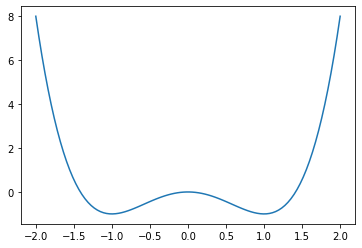

In [61]:
xplot = np.linspace(-2, 2, 100)
plt.plot(xplot, f(xplot))
plt.show()

-0.999872859492857


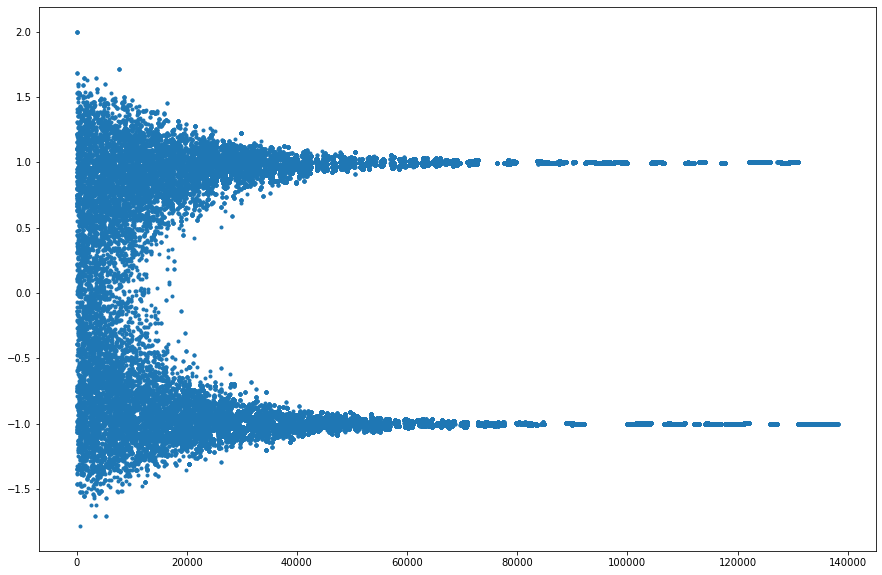

In [62]:
from random import gauss

x, N = 2, 0
mean, stdesv = 0, 1
D = f(x)
xarr = [x]

Tmax = 1.0 # T0
Tmin = 1e-6
τ = 1e4
t = 0
T = Tmax

while T > Tmin: 
    t += 1
    T = Tmax*np.exp(-t/τ) # Enfriamiento
    
    oldD = D
    δ = gauss(mean, stdesv)
    x = x + δ
    D = f(x)
    deltaD = D - oldD
    
    # Si el movimiento se rechaza, los intercambia de nuevo
    if random() >= np.exp(-deltaD/T):
        x -= δ
        D = oldD
    N += 1
    xarr.append(x)

print(x)
fig, ax =  plt.subplots(figsize=(15,10))
ax.plot(list(range(N+1)), xarr, '.')
plt.show()